### Laboratorio #2

Problema #1:

Desarrolle una funcion que permita hacer la binarizacion de una imagen, para realizarlo puede
utilizar el enfoque que prefiera.

In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

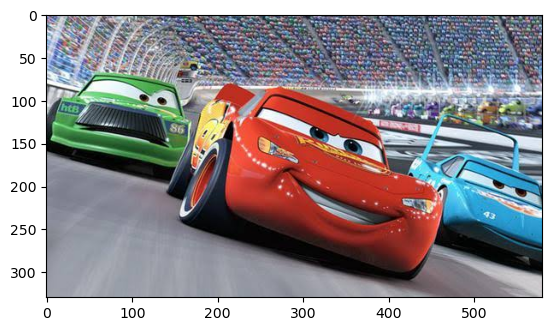

In [172]:
imgName = 'QCHAO.jpeg'
img = cv2.imread(imgName)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

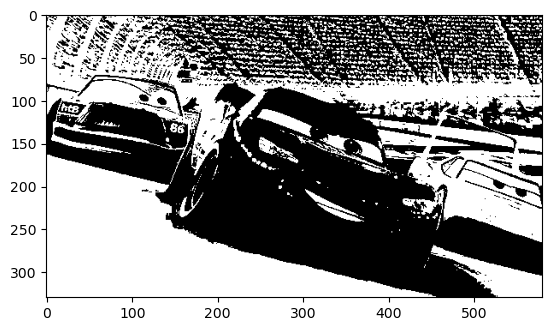

In [173]:
def binarizar(img):
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    umbr, imagen = cv2.threshold(imgGray, 128, 255, cv2.THRESH_BINARY)
    return imagen

imgBin = binarizar(img)
plt.imshow(imgBin, cmap = "gray")

Problema #2:

Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas imagenes recuerde que para realizar las operaciones logicas es necesario pasar
la imagen a escala de grises y luego binarizarla.

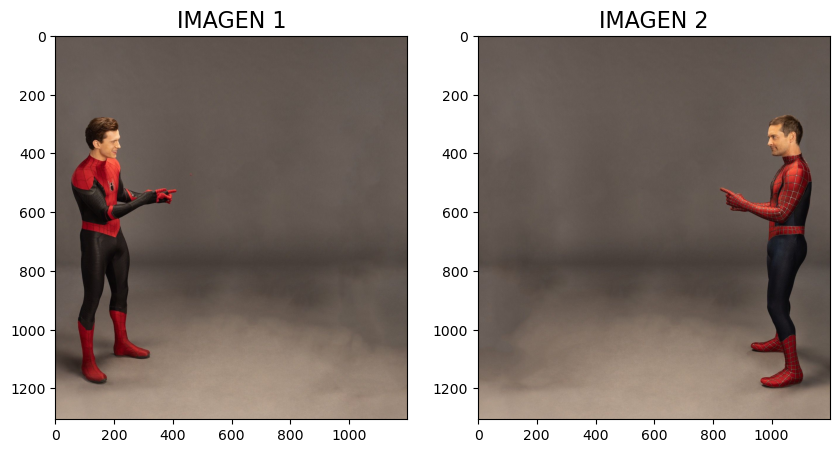

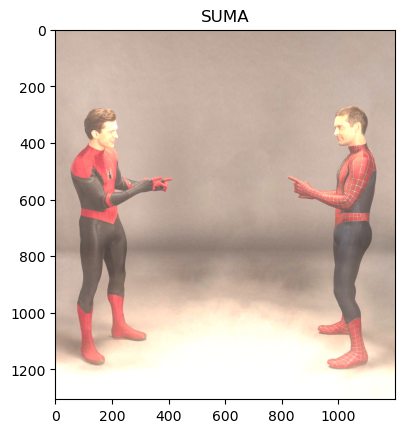

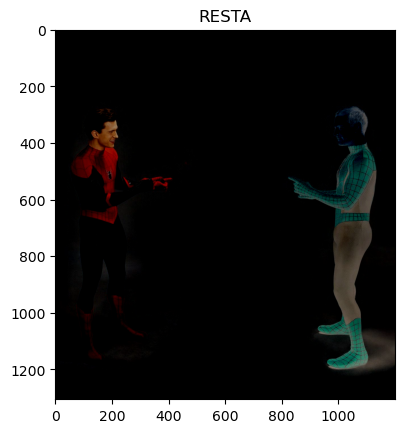

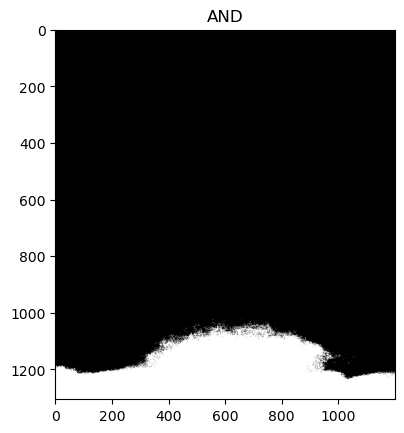

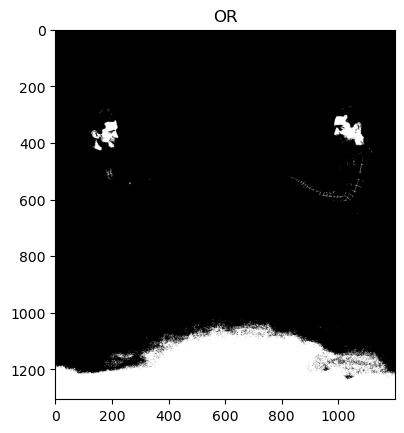

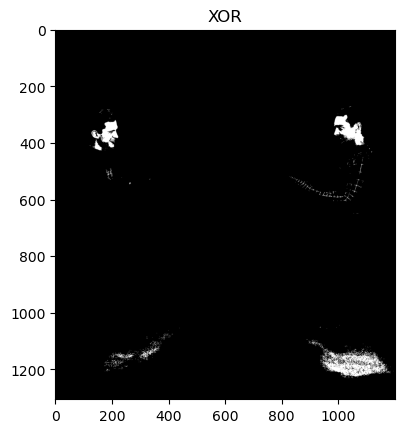

In [176]:
def salidaImg(salida, titulo):
    imagen_salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)
    plt.title(titulo)
    plt.imshow(imagen_salida)
    plt.show()
    
def operacionImagen( imagenA, imagenB):

    titulos = ['IMAGEN 1', 'IMAGEN 2']
    lista = [imagenA, imagenB]
    # Desplegar las 2 imagenes
    plt.figure(figsize=(10,10))
    for i in range(len(lista)):
        plt.subplot(1, len(lista), i + 1)
        plt.imshow(lista[i])
        plt.title(format(titulos[i]), fontdict={"fontsize":16})
    plt.show()

    #Imagen de salida
    salida = np.zeros(imagenA.shape)
    bin_image1 = binarizar(imagenA)
    bin_image2 = binarizar(imagenB)
    #Operar imagenes
    operacion = "SUMA"
    salida = cv2.add(image1, image2)
    salidaImg(salida, operacion)
    operacion = "RESTA"
    salida = cv2.subtract(image1, image2)
    salidaImg(salida, operacion)
    operacion = "AND"
    salida = cv2.bitwise_and(bin_image1, bin_image2)
    salidaImg(salida, operacion)
    operacion = "OR"
    salida = cv2.bitwise_or(bin_image1, bin_image2)
    salidaImg(salida, operacion)
    operacion = "XOR"
    salida = cv2.bitwise_xor(bin_image1, bin_image2)
    salidaImg(salida, operacion)
        
    
img1 = cv2.imread("sp1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# Se cargan las imágenes de prueba
img2 = cv2.imread("sp2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

operacionImagen(img1, img2)

Problema #3:

Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.


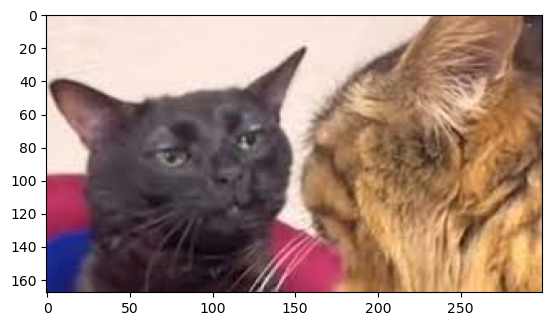

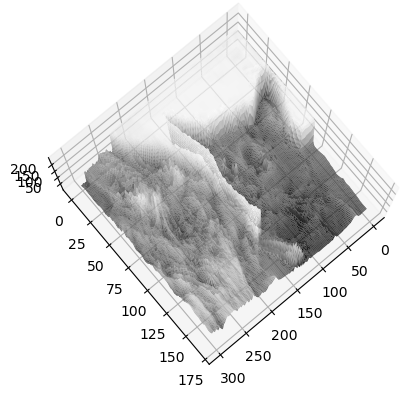

In [71]:
def img_Plot3D(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x = np.linspace(1, gray.shape[1], num = gray.shape[1])
    y = np.linspace(1, gray.shape[0], num = gray.shape[0])
    xx, yy = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(xx, yy, gray, rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
    ax.view_init(80, 50)

imgName = 'cat1.jpeg'
img3d = cv2.imread(imgName)
img3d = cv2.cvtColor(img3d, cv2.COLOR_BGR2RGB)
plt.imshow(img3d)
plt.show()

img_Plot3D(img3d)

Problema #4:

Implemente una funcion para cada una de las trasformaciones vistas en clase: negativa, lineal,
logarıtmica y exponencial.

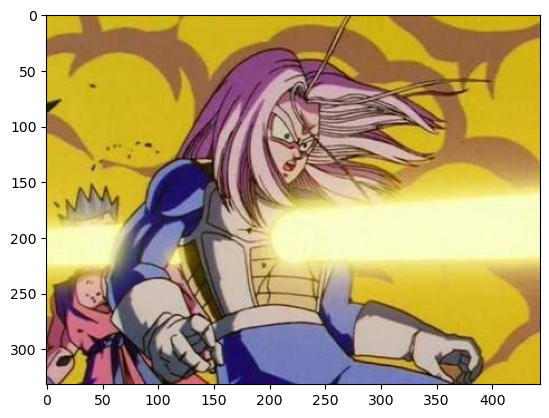

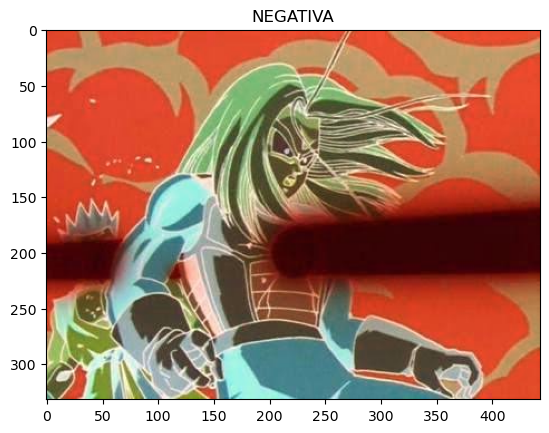

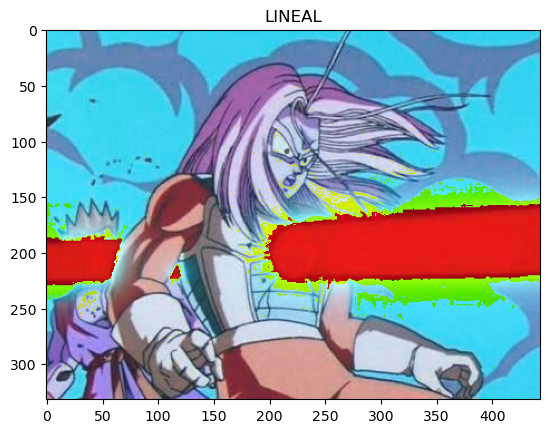

C:\Users\MYN\AppData\Local\Temp\ipykernel_24864\3117464400.py:18: RuntimeWarning: divide by zero encountered in log
  salida =  alpha * np.log(imgn)


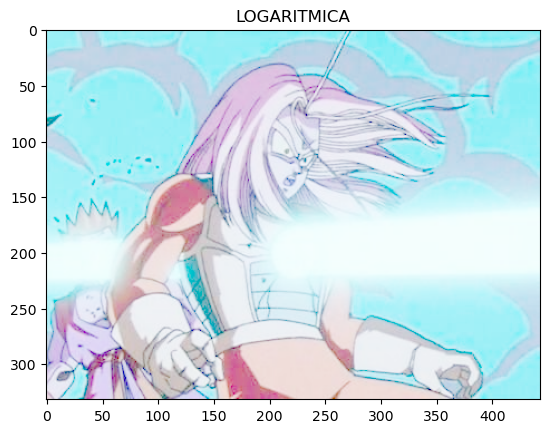

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


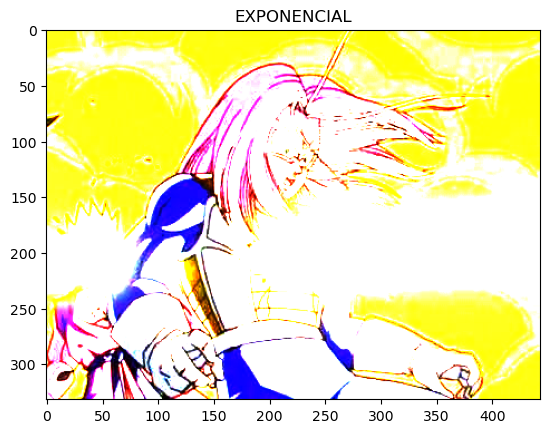

In [129]:

def transformImagen(img):
    salida = 255 - img
    
    imagen_salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)    
    plt.title('NEGATIVA')
    plt.imshow(imagen_salida)
    plt.show()
    
    salida = (1 * img) + 30
    
    imagen_salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)
    plt.title('LINEAL')
    plt.imshow(imagen_salida)
    plt.show()
    
    imgn = np.array(img, dtype = np.uint16)
    alpha = 255 / np.log(1 + np.max(imgn)) 
    salida =  alpha * np.log(imgn)
    salida = np.array(salida, dtype = np.uint8) 
    
    imagen_salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)
    plt.title('LOGARITMICA')
    plt.imshow(imagen_salida)
    plt.show()
    
    salida = 0.2*(((img)/255)**3)
    salida = salida*255
    
    plt.title('EXPONENCIAL')
    plt.imshow(salida)
    plt.show()

imgName = 'tr1.jpeg'
imgt = cv2.imread(imgName)
imgt = cv2.cvtColor(imgt, cv2.COLOR_BGR2RGB)
plt.imshow(imgt)
plt.show()

transformImagen(imgt)

Problema #5:

Desarrolle una funcion que dada una imagen a color, cualquier kernel con cualquier dimension
(3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano),
aplique un filtro de convolucion a dicha imagen y muestre la imagen original y la imagen filtrada.
Le recomendamos implementar el kernel como un arreglo de numpy.

In [163]:
def convolucionTransform(image, kernel, nombre):
  titulos = ['ORIGINAL', nombre]
  convolucion = cv2.filter2D(image, -1, kernel)
  lista = [image,convolucion ]
  # Desplegar las 2 imagenes
  plt.figure(figsize=(15,15))
  for i in range(len(lista)):
    plt.subplot(1, len(lista), i + 1)
    plt.imshow(lista[i])
    plt.title("filtro: {}".format(titulos[i]), fontdict={"fontsize":16})
  plt.show()

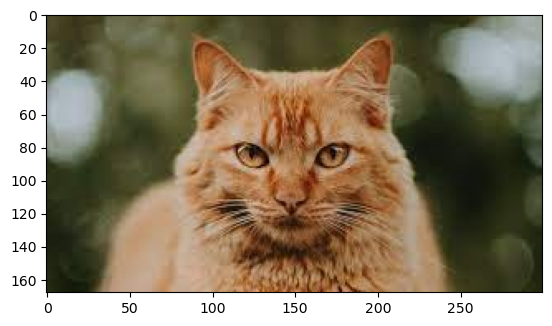

In [164]:
img = cv2.imread("cat.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [165]:
blur = np.ones((7, 7)) * (1.0 / (7 * 7))


gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                         [2., 4., 2.],
                                         [1., 2., 1.]])
sobel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

unsharp = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

laplacian = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

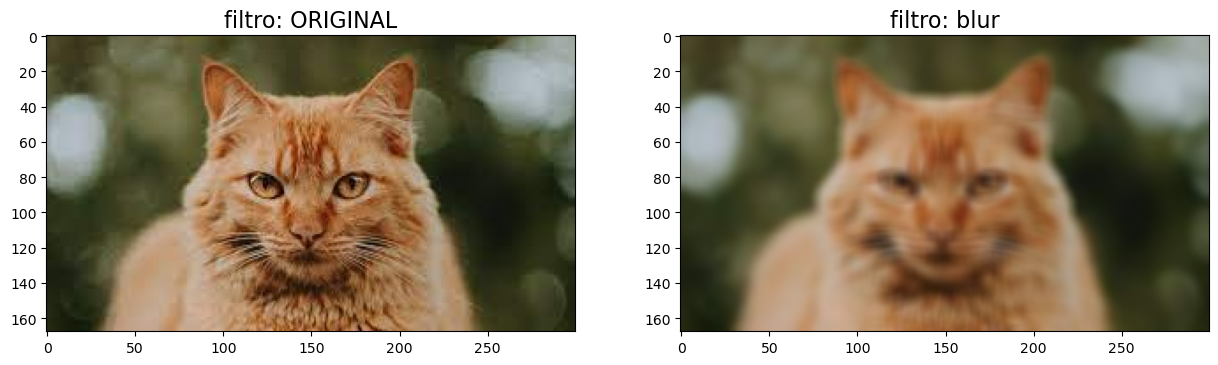

In [166]:
convolucionTransform(img, blur, 'blur')

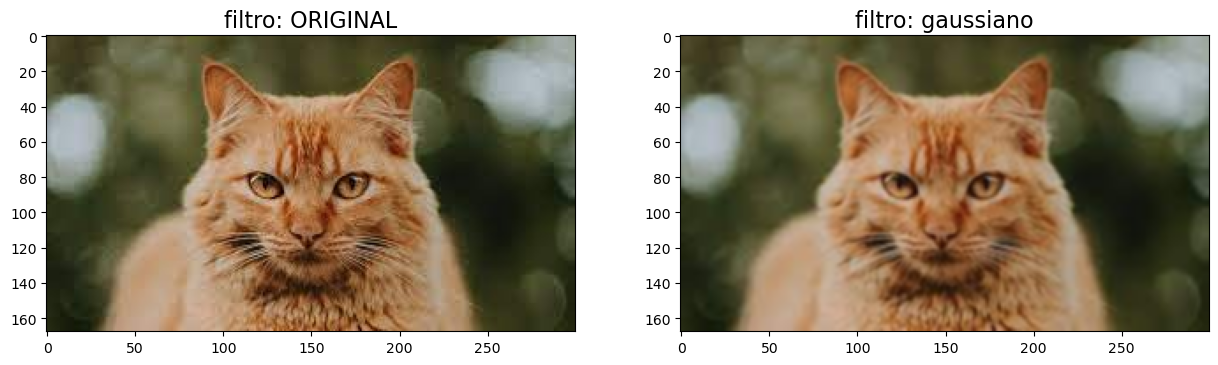

In [158]:
convolucionTransform(img, gaussian, 'gaussiano')

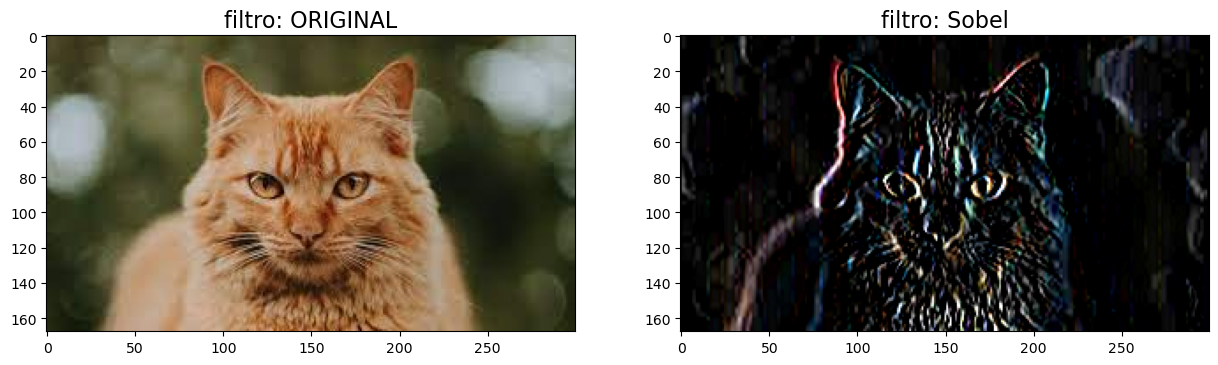

In [159]:
convolucionTransform(img, sobel, 'Sobel')

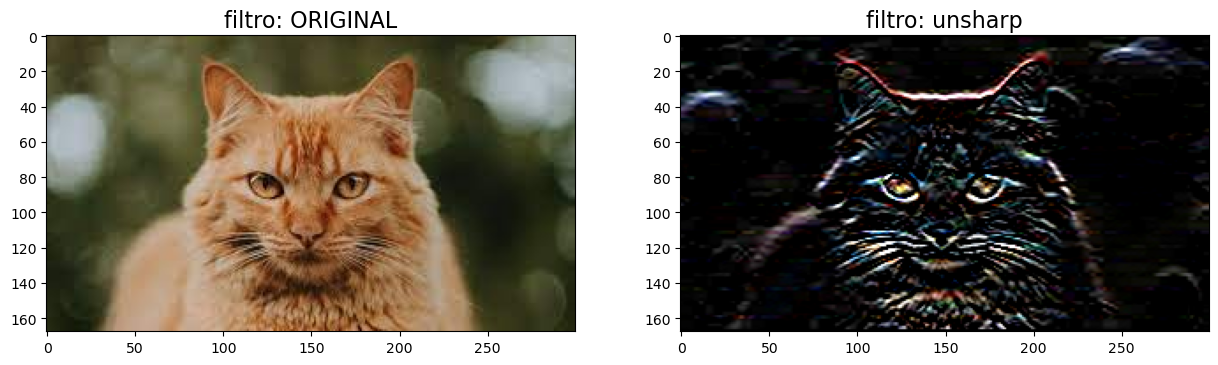

In [160]:

convolucionTransform(img, unsharp, 'unsharp')

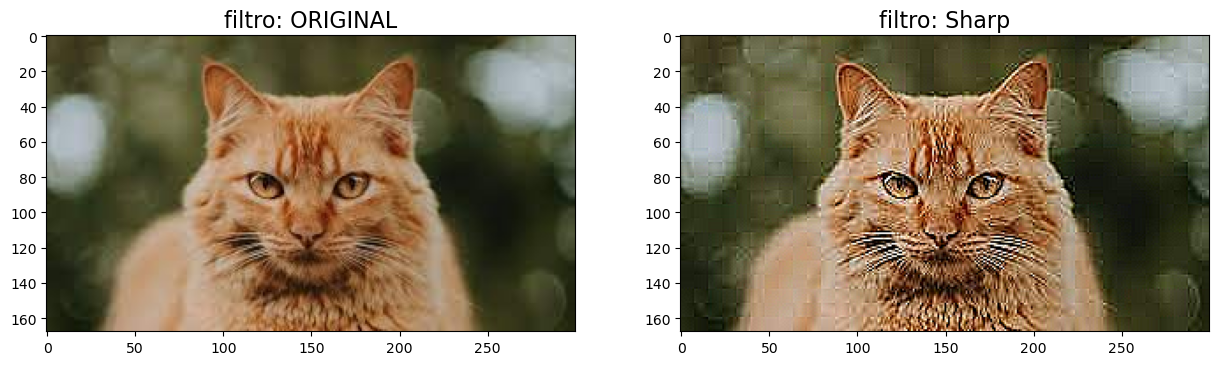

In [161]:
convolucionTransform(img, sharp, 'Sharp')

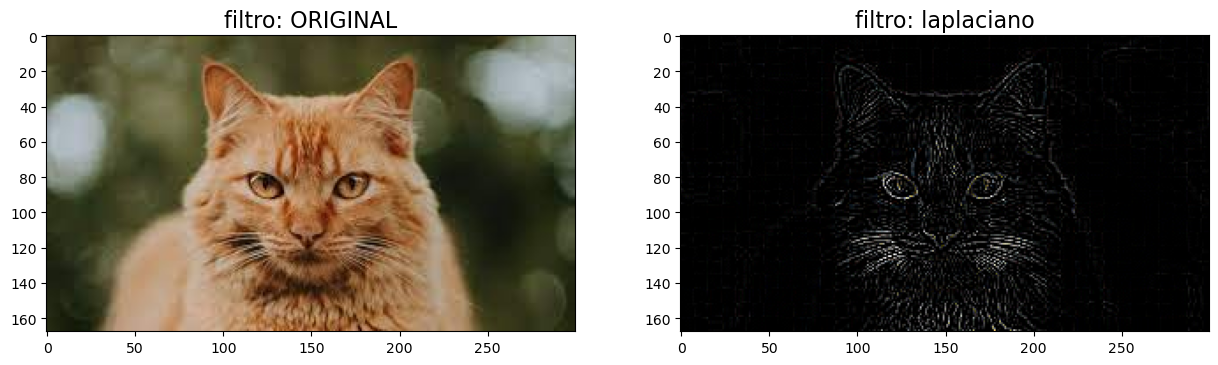

In [162]:
convolucionTransform(img, laplacian, 'laplaciano')

Problema 6:

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

Filtro Laplaciano
* Filtro para realzar detalles finos
* Discretización de la segunda derivada
* Debe de ser un filtro isotrópico (rotacionalmente invariante) para un cierto ángulo
* El operador isotrópico más simple es el operador laplaciano:

Para armar el kernel se debe de descretizar el laplaciano con:

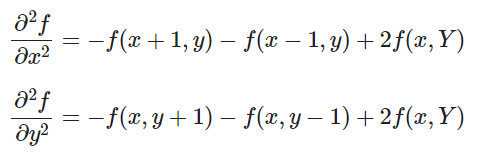

para dar un resultado de :

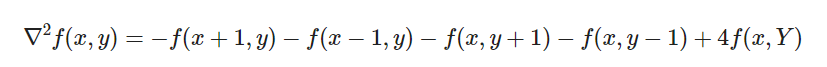

La suma de coeficientes es cero por lo que no afecta zonas planas de la imagen

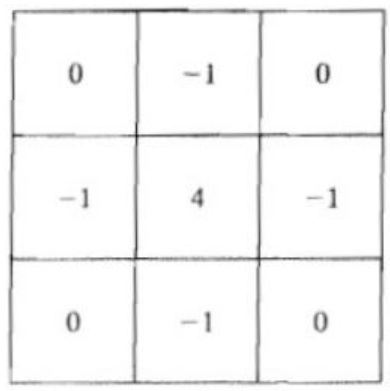